In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [80]:
df = pd.read_csv('Romania_sunflower_TabNet_predicted_full_100epoch.csv') 
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Latitude,Longitude,avg_t2m,avg_vsw_0,avg_vsw_1,avg_tciwv,avg_r2,avg_voltso,avg_orog,avg_sot1,avg_sot2,avg_sot3,avg_vwiltm_0,TabNet_predicted_area
0,0,0,0,43.665018,20.083512,288.554078,0.170789,0.184549,14.275121,57.540834,0.272105,615.62820,289.386237,281.015576,286.122716,0.153108,97.578630
1,1,1,1,43.657087,20.150590,289.092381,0.145609,0.157466,15.519450,55.923158,0.272105,581.60474,292.518339,282.971078,286.417399,0.153108,97.770256
2,2,2,2,43.649113,20.217649,288.760648,0.145609,0.157466,15.519450,56.179614,0.272105,624.51636,292.518339,282.971078,286.417399,0.153108,97.648020
3,3,3,3,43.641095,20.284687,287.642538,0.166077,0.179981,15.313973,57.967266,0.272105,754.22290,290.986599,282.191825,286.470062,0.153108,1269.480600
4,4,4,4,43.633034,20.351706,286.965346,0.166077,0.179981,15.313973,59.115920,0.272105,918.23020,290.986599,282.191825,286.470062,0.153108,96.983120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13381,13381,13381,13381,48.388983,29.591780,287.663724,0.143605,0.188064,16.217871,58.516637,0.358925,198.30151,289.824812,283.172923,290.335892,0.203392,526.496340
13382,13382,13382,13382,48.374885,29.663132,287.551338,0.143219,0.187604,16.314645,58.954679,0.358925,182.61450,289.501810,282.997204,290.443883,0.203392,519.635860
13383,13383,13383,13383,48.360742,29.734442,287.154365,0.143219,0.187604,16.314645,60.347746,0.358524,169.42017,289.501810,282.997204,290.443883,0.205302,513.195900
13384,13384,13384,13384,48.346553,29.805713,287.153416,0.143219,0.187604,16.314645,60.534703,0.358205,163.07251,289.501810,282.997204,290.443883,0.206754,506.957550


In [81]:
filtered_df = df[df['avg_orog'] > 6]
plotting_df = filtered_df[['Latitude', 'Longitude', 'TabNet_predicted_area']]
plotting_df

,Latitude,Longitude,TabNet_predicted_area
0,43.665018,20.083512,97.578630
1,43.657087,20.150590,97.770256
2,43.649113,20.217649,97.648020
3,43.641095,20.284687,1269.480600
4,43.633034,20.351706,96.983120
...,...,...,...
13381,48.388983,29.591780,526.496340
13382,48.374885,29.663132,519.635860
13383,48.360742,29.734442,513.195900
13384,48.346553,29.805713,506.957550


In [7]:
import folium
import math

# Create a map centered around the mean latitude and longitude
mean_lat = plotting_df['Latitude'].mean()
mean_lon = plotting_df['Longitude'].mean()
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

# Iterate through the DataFrame and add circles for each row
for index, row in plotting_df.iterrows():
    folium.Circle(
        location=[row['Latitude'], row['Longitude']],
        radius=math.sqrt(row['TabNet_predicted_area']),  # Assuming area is the diameter, convert to radius
        color='blue',  # Circle color
        fill=True,
        fill_color='blue',  # Fill color
        fill_opacity=0.4,  # Fill opacity
        popup=f'Area: {row["TabNet_predicted_area"]:.2f}'  # Popup with area information
    ).add_to(m)

# Display the map
m.save('map.html')


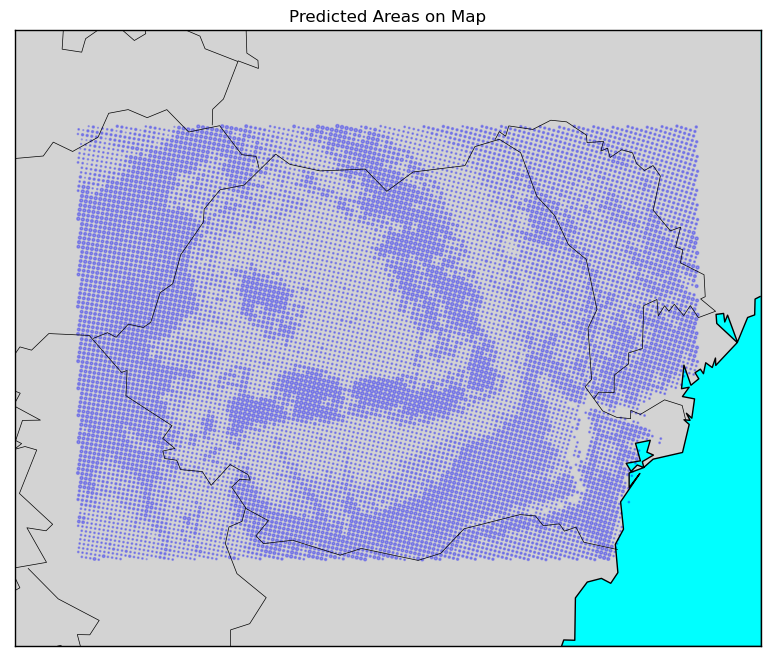

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Assuming 'plotting_df' is your DataFrame with 'Latitude', 'Longitude', and 'TabNet_predicted_area' columns
# Example: plotting_df = pd.DataFrame({'Latitude': [lat_values], 'Longitude': [long_values], 'TabNet_predicted_area': [area_values]})

# Create a Basemap object
m = Basemap(
    projection='merc',  # Mercator projection
    llcrnrlat=plotting_df['Latitude'].min() - 1,  # Set the map boundaries based on your data
    urcrnrlat=plotting_df['Latitude'].max() + 1,
    llcrnrlon=plotting_df['Longitude'].min() - 1,
    urcrnrlon=plotting_df['Longitude'].max() + 1,
    resolution='l'  # Set the map resolution ('l' for low)
)

radius = np.sqrt(plotting_df['TabNet_predicted_area']) / 10

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Draw map details
m.drawcoastlines()  # Draw coastlines
m.drawcountries()   # Draw countries
m.drawstates()      # Draw states
m.fillcontinents(color='lightgray', lake_color='aqua')  # Fill continents with a color
m.drawmapboundary(fill_color='aqua')  # Fill the globe with a color (for oceans)

# Convert latitude and longitude to map coordinates
x, y = m(plotting_df['Longitude'].values, plotting_df['Latitude'].values)

# Scatter plot with circles
m.scatter(x, y, s=radius, c='blue', alpha=0.3)

# Add a title and show the plot
plt.title('Predicted Areas on Map')
plt.show()


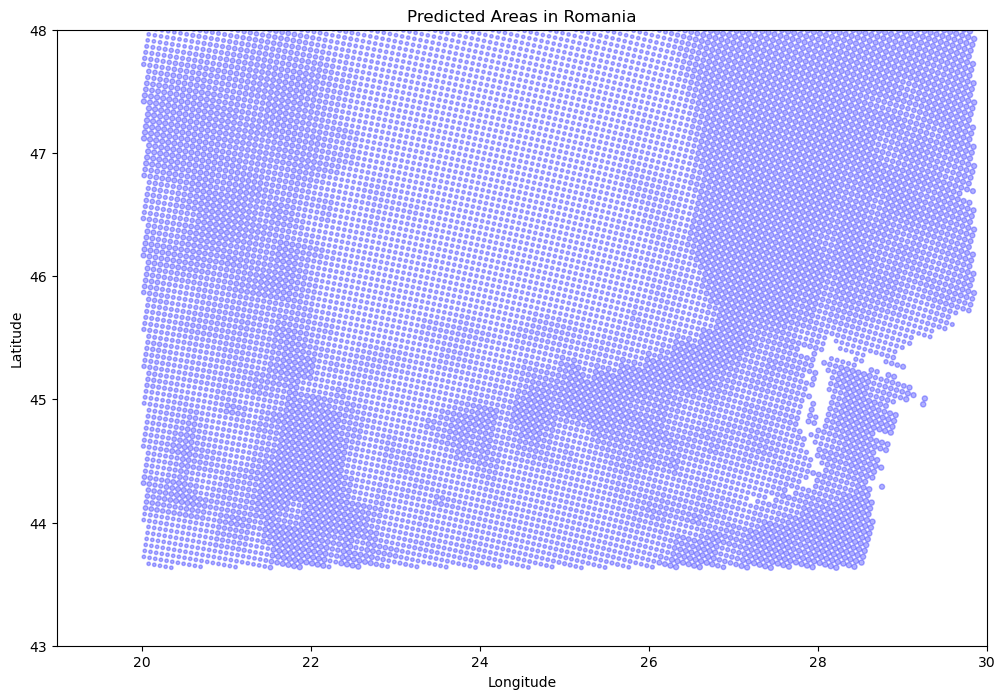

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set the map boundaries for Romania (approximate values)
ax.set_xlim(19, 30)  # Adjust these values according to your desired zoom level
ax.set_ylim(43, 48)  # Adjust these values according to your desired zoom level

# Calculate the radius based on the square root of predicted area
radius = np.sqrt(plotting_df['TabNet_predicted_area']) / 20

# Scatter plot with circles
ax.scatter(
    plotting_df['Longitude'],
    plotting_df['Latitude'],
    s=radius,
    c='blue',
    alpha=0.3
)

# Set axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a title
plt.title('Predicted Areas in Romania')

# Show the plot
plt.show()
